#Important Libraries

In [ ]:
import numpy as np    #Data Array / Complex mathematics
import pandas as pd  # Data Analytics / CSV operation 
import matplotlib.pyplot as plt  #data Visualization 
import seaborn as sn  #data Visualization
import sklearn  #machine Learning

# Read Data

In [ ]:
df = pd.read_csv('titanic.csv')   #read CSV File

In [ ]:
df

#Explore Data in Depth

In [ ]:
df.shape   # Column and Row

In [ ]:
df.columns  #column Names

In [ ]:
df.dtypes  # Data Typs 

In [ ]:
df.count()  # All Data Count 

In [ ]:
df.isnull()  # Missing Data 

In [ ]:
df.isnull().sum()  # Total Missing Data Summary

In [ ]:
df.head()   # First 5 Data

In [ ]:
df.head(10)

In [ ]:
df['Pclass'].head()   # Perticular Column first 5 data 

In [ ]:
df.tail() # Last 5 Data 

In [ ]:
df.tail(10)

In [ ]:
df.sample()  # Ramdom 1 Data

In [ ]:
df.sample(5)

In [ ]:
df[0:10]   # 0 to 10 all data

In [ ]:
df.info() # Total info of data

In [ ]:
df.describe()  # Statics of Data

In [ ]:
df.describe().T

In [ ]:
df['Survived'].value_counts()

#Visualization of Data

In [ ]:
df.hist(figsize = (20,20))

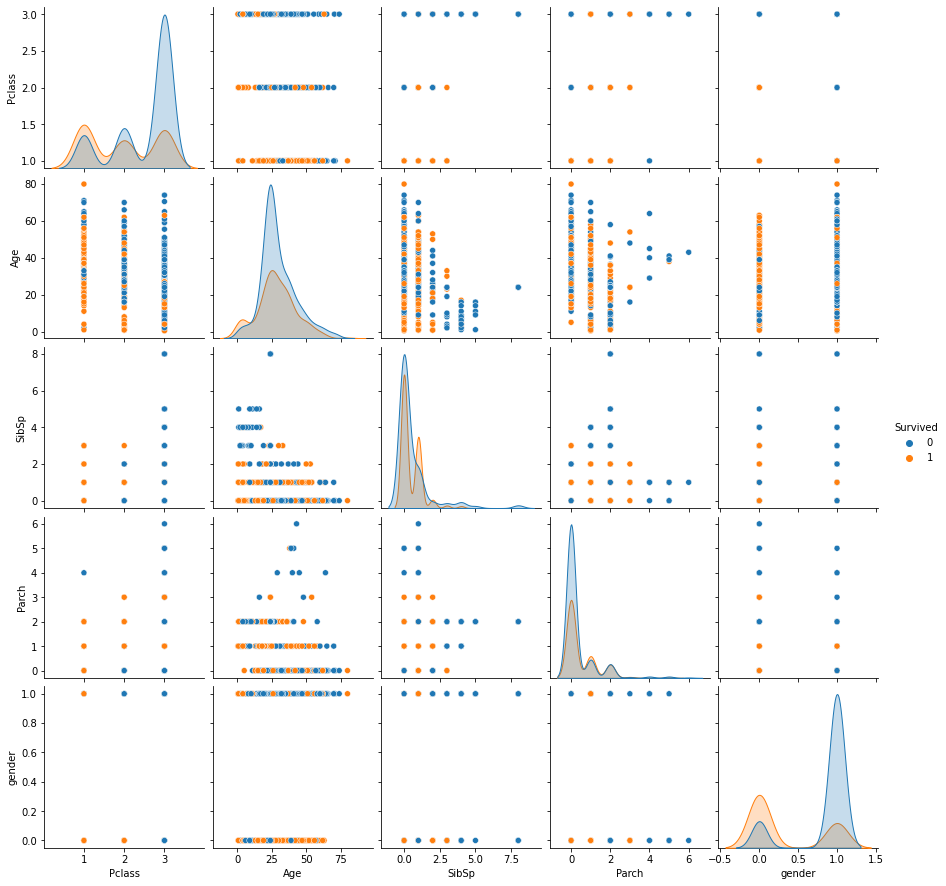

In [ ]:
sn.pairplot(df, hue = 'Survived')  #very important 

In [ ]:
df.corr()

In [ ]:
sn.heatmap(df.corr())

In [ ]:
sn.countplot(x='Survived',data=df)
plt.show()

In [ ]:
sn.scatterplot(x='Fare', y='Age',data=df)
plt.show()

In [ ]:
sn.distplot(df['Age'])

#Data Cleaning

In [ ]:
df.isnull().sum()

Age Data is Missing

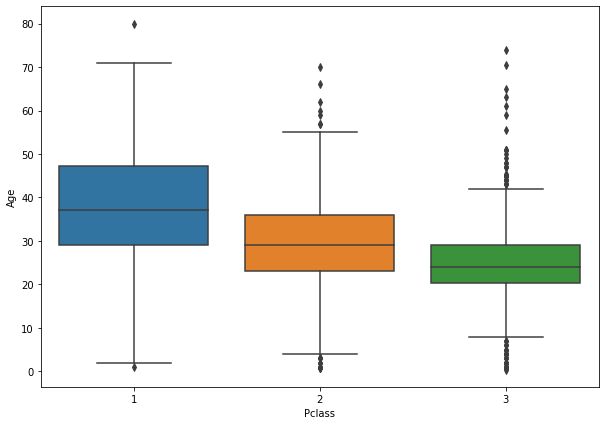

In [ ]:
plt.figure(figsize=(10,7))
sn.boxplot(x='Pclass',y='Age',data=df)

In [ ]:
import plotly.express as px
fig = px.box(df, x='Pclass',y='Age')
fig.show()

In [ ]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
df['Age'] = df[['Age','Pclass']].apply(age,axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
df['Sex'].head()

In [ ]:
pd.get_dummies(df['Sex'])

In [ ]:
pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
gender = pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
df = pd.concat([df,gender],axis=1)

In [ ]:
df.head()

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop('Sex',axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.rename(columns= {'male':'gender'},inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
df.drop('PassengerId',axis=1,inplace=True)

In [ ]:
df.drop('Embarked',axis=1,inplace=True)

In [ ]:
df.drop('Ticket',axis=1,inplace=True)

In [ ]:
df.drop('Fare',axis=1,inplace=True)

In [ ]:
df.head()

# Decide Dependant and Independant Elements in Data Set

In [ ]:
x=df.drop('Survived',axis=1)

In [ ]:
x

In [ ]:
y=df['Survived']

In [ ]:
y

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [ ]:
X_train.info()

In [ ]:
X_test.info()

![Whiteboard[1]-04.png](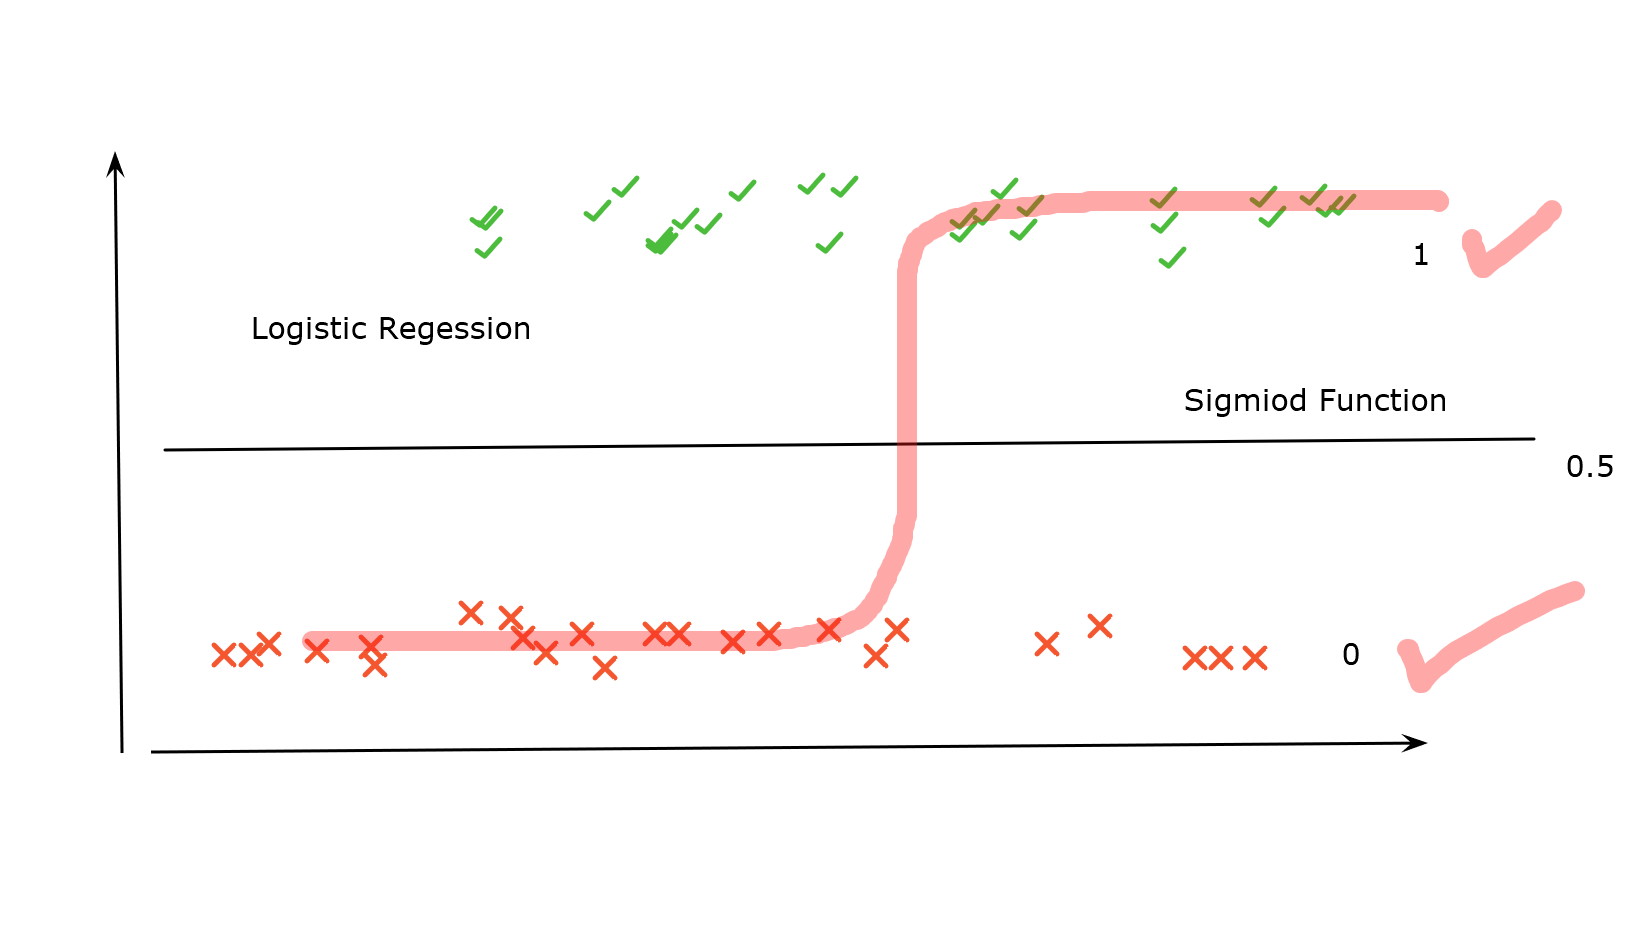)

> Indented block



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression() 

In [ ]:
logmodel.fit(X_train,y_train)   # Training

In [ ]:
predictions = logmodel.predict(X_test)  # testing 

In [ ]:
from sklearn.metrics import confusion_matrix   # Model Evaluation 

In [ ]:
print(confusion_matrix(y_test,predictions))

[[135  30]
 [ 26  77]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.72      0.75      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [1]:

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

NameError: ignored